In [1]:
pip install pandas numpy scipy matplotlib openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


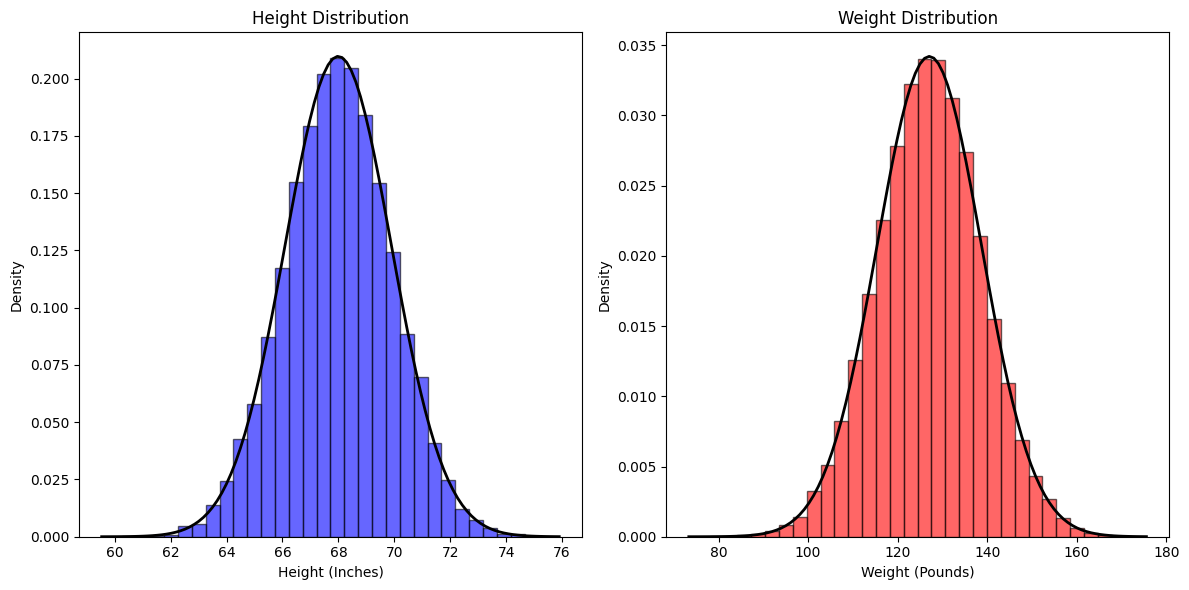

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'SOCR-HeightWeight.csv'  

# Attempt to read the file
try:
    df = pd.read_csv(file_path)
    
    # Check if DataFrame is empty
    if df.empty:
        raise ValueError("The CSV file is empty.")
    
    # Ensure the correct columns are present
    required_columns = ['Height(Inches)', 'Weight(Pounds)']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"The CSV file must contain the following columns: {required_columns}")
    
    # Extract height and weight columns
    heights = df['Height(Inches)']
    weights = df['Weight(Pounds)']
    
    # Calculate mean and standard deviation
    height_mean, height_std = heights.mean(), heights.std()
    weight_mean, weight_std = weights.mean(), weights.std()
    
    # Create histograms
    plt.figure(figsize=(12, 6))

    # Plot heights
    plt.subplot(1, 2, 1)
    plt.hist(heights, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, height_mean, height_std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Height Distribution')
    plt.xlabel('Height (Inches)')
    plt.ylabel('Density')

    # Plot weights
    plt.subplot(1, 2, 2)
    plt.hist(weights, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, weight_mean, weight_std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Weight Distribution')
    plt.xlabel('Weight (Pounds)')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

